In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [8]:
dataset = pd.read_csv('cardiovascular_diseases_dv3.csv', delimiter=';')

dataset

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [10]:

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

X_test = test_dataset.drop(['CARDIO_DISEASE'], axis=1).values
y_test = test_dataset['CARDIO_DISEASE'].values

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['CARDIO_DISEASE'], axis=1).values
y_train = train_dataset['CARDIO_DISEASE'].values
m_train = len(y_train)


In [11]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [12]:
X_norm, mu, sigma= featureNormalize(X_train)

In [22]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print(len(X_ready[0]))
X_ready



12


array([[ 1.        , -0.49485814, -0.729961  , ..., -0.30998676,
        -0.238264  ,  0.49658447],
       [ 1.        ,  1.28053316,  1.36993621, ...,  3.22594427,
        -0.238264  ,  0.49658447],
       [ 1.        , -1.08665524,  1.36993621, ..., -0.30998676,
        -0.238264  ,  0.49658447],
       ...,
       [ 1.        ,  0.98463461, -0.729961  , ..., -0.30998676,
        -0.238264  ,  0.49658447],
       [ 1.        ,  1.42848244,  1.36993621, ..., -0.30998676,
        -0.238264  ,  0.49658447],
       [ 1.        ,  0.98463461, -0.729961  , ..., -0.30998676,
        -0.238264  ,  0.49658447]])

In [16]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [60]:
print(sigmoid(0))

0.5


In [19]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [20]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [27]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 1000
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo


########################################################################################################
Los valores de theta calculados son:
theta 1: -0.00277687955363616
theta 2: 0.3121822783300828
theta 3: -0.013042079175918002
theta 4: -0.03230672271606934
theta 5: 0.16889688397103686
theta 6: 0.5977462517814397
theta 7: 0.3182561404277051
theta 8: 0.2732995847033888
theta 9: 0.00468680194312418
theta 10: -0.03799522845342452
theta 11: -0.03592210812684813
theta 12: -0.07669785952535293
########################################################################################################
con un costo de: 0.5666522432520339 


Text(0, 0.5, 'Costo J')

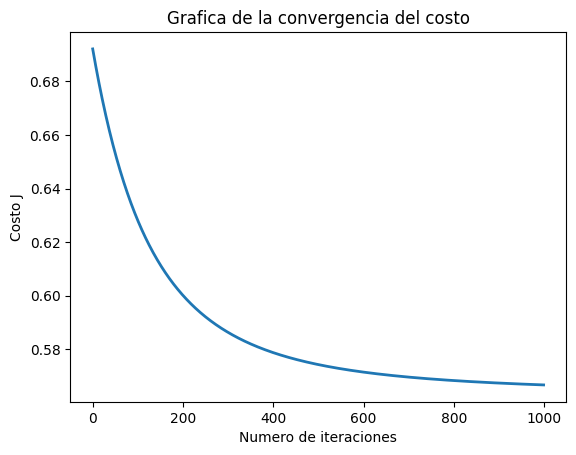

In [28]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [47]:
X_array = [1,55,1,156,85,140,90,3,1,0,0,1]

X_array[1:] = (X_array[1:] - mu) / sigma

resultados = sigmoid(np.dot(X_array, theta)) 

print(f"Una persona con las caracteristicas: {X_array} ")
print(f'tiene una probabilida de tener diabetes de:{resultados *100} %')

print(f"con valores de theta: { theta }")

Una persona con las caracteristicas: [1, 0.24488823434796322, -0.7299609957548527, -1.0236129659748714, 0.7625397124279499, 0.8027691288945107, 0.8959132635143767, 2.4007237833752253, -0.39578359840475863, -0.3099867564457329, -0.23826399864784698, 0.49658446926226013] 
tiene una probabilida de tener diabetes de:83.84238543636756 %
con valores de theta: [-0.00277688  0.31218228 -0.01304208 -0.03230672  0.16889688  0.59774625
  0.31825614  0.27329958  0.0046868  -0.03799523 -0.03592211 -0.07669786]


In [50]:
m_test= len(X_test)

In [52]:
X_norm_test, mu_test, sigma_test= featureNormalize(X_test)

In [53]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

X_test_ready

array([[ 1.        , -0.6253646 , -0.73908832, ..., -0.3132096 ,
        -0.23723556,  0.48731318],
       [ 1.        ,  0.40349067, -0.73908832, ..., -0.3132096 ,
        -0.23723556,  0.48731318],
       [ 1.        ,  0.55047   , -0.73908832, ..., -0.3132096 ,
        -0.23723556,  0.48731318],
       ...,
       [ 1.        ,  0.84442865, -0.73908832, ..., -0.3132096 ,
        -0.23723556,  0.48731318],
       [ 1.        , -1.06630258,  1.35301827, ..., -0.3132096 ,
        -0.23723556,  0.48731318],
       [ 1.        ,  0.99140798,  1.35301827, ..., -0.3132096 ,
        -0.23723556,  0.48731318]])

In [57]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

In [59]:
y_predicha =[]

for data_test_ready in X_test_ready:
    y_predicha.append(sigmoid(np.dot(X_array, theta)))
    

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_predicha, y_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 0.3667693161456747
Raíz del Error Cuadrático Medio (RMSE) = 0.6056148249057933
